## **COURSE FINAL PROJECT: CUSTOMER CHURN**

The main objective of this analysis is to predict customer churn for a telecom company and understand which factors drive churn. The model is primarily predictive, but I also care about interpretation, so that the business can design focused customer retention programs (e.g., special offers for high-risk customers, improving services that strongly affect churn).

#### **1. SETUP & DATA LOADING**

In [ ]:
# 0.1: Install and import libraries
%pip install -q scikit-learn requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from io import StringIO
import requests

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
# 0.2: Load dataset

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/" \
      "IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"

response = requests.get(url, verify=False)
churn_df = pd.read_csv(StringIO(response.text))

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


#### **2. DATASET DESCRIPTION & INITIAL EXPLORATION**

In [8]:
# Check columns and basic info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [9]:
# Quick statistical summary of numerical columns
churn_df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [11]:
# Check the first few rows
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


#### **3. TARGET VARIABLE DISTRIBUTION**

In [12]:
# Check the column names to confirm target name
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [13]:
# Distribution of churn vs non-churn
churn_df['churn'].value_counts(normalize=True)

churn
0.0    0.71
1.0    0.29
Name: proportion, dtype: float64

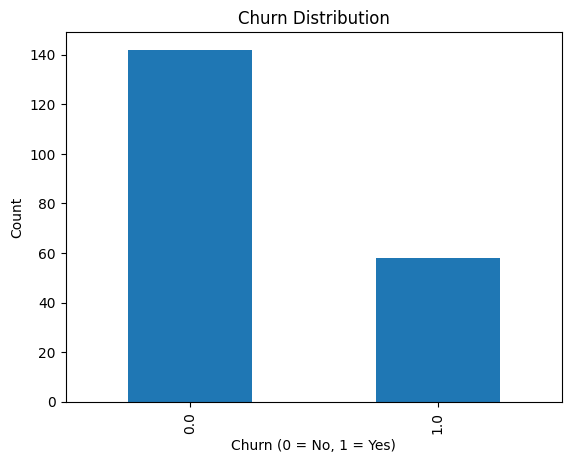

In [14]:
churn_df['churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

The dataset shows that approximately 29% of customers churn while 71% remain active. This indicates a moderately imbalanced dataset, which is common in churn prediction. Because churned customers represent a minority class, evaluation metrics such as ROC-AUC, precision, recall, and confusion matrices are important to ensure the model performs well on the minority class. Accuracy alone may be misleading.

#### **4. DATA CLEANING & FEATURE ENGINEERING**

In [16]:
# Check for missing values in each column
churn_df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

No missing values, no imputation required.

In [18]:
# Separate features (X) and target (y)
target_col = 'churn'

X = churn_df.drop(columns=[target_col])
y = churn_df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (200, 27)
y shape: (200,)


In [19]:
# Correlation of features with churn
corr_with_churn = churn_df.corr(numeric_only=True)['churn'].sort_values(ascending=False)
corr_with_churn

churn       1.000000
equip       0.275284
equipmon    0.255348
internet    0.254838
ebill       0.254838
ed          0.216112
wiremon     0.177483
wireless    0.174356
voice       0.142315
pager       0.124623
custcat     0.014839
tollmon     0.014356
callwait   -0.052885
tollten    -0.059482
logtoll    -0.070156
confer     -0.081361
income     -0.090790
lninc      -0.117459
cardmon    -0.177163
cardten    -0.228634
address    -0.260659
age        -0.287697
longmon    -0.292026
longten    -0.294906
callcard   -0.311451
loglong    -0.336869
employ     -0.337969
tenure     -0.376860
Name: churn, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

# Train–test split (stratify to preserve churn %, 70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((140, 27), (60, 27))

#### **5. MODEL TRAINING SUMMARY (with Class Weight)**

I will train three models:

1.	Logistic Regression (with class_weight='balanced')
2.	Random Forest (with class_weight='balanced_subsample')
3.	SVM with RBF kernel (with class_weight='balanced')

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)

#### MODEL 1: Logistic Regression (with Class Weights)

In [22]:
# Logistic Regression pipeline with scaling & class weights
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',  # compensate for 29% churn minority
        random_state=42
    ))
])

# Train Logistic Regression
log_reg_pipeline.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg_pipeline.predict(X_test)
y_proba_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]

In [23]:
# Evaluation metrics for Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print("Logistic Regression Accuracy:", acc_lr)
print("Logistic Regression ROC-AUC:", roc_auc_lr)
print("\nClassification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7666666666666667
Logistic Regression ROC-AUC: 0.7688098495212039

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83        43
         1.0       0.58      0.65      0.61        17

    accuracy                           0.77        60
   macro avg       0.72      0.73      0.72        60
weighted avg       0.78      0.77      0.77        60



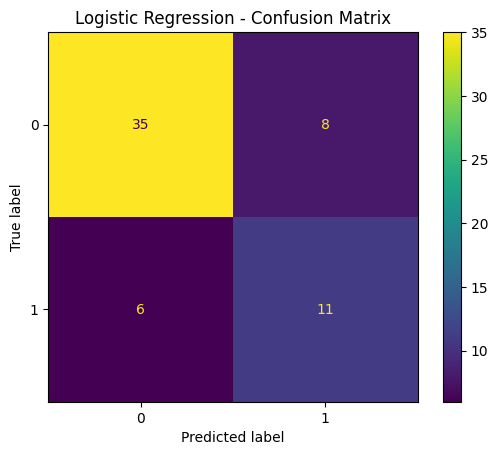

In [24]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

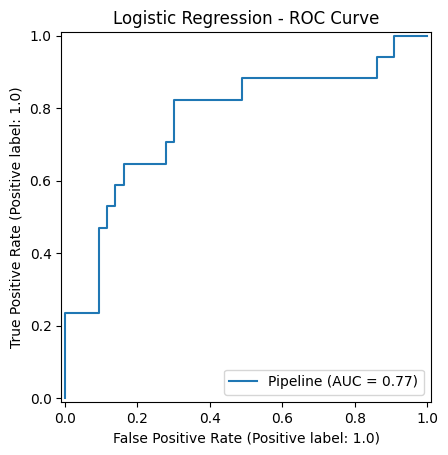

In [25]:
# ROC Curve for Logistic Regression
RocCurveDisplay.from_estimator(log_reg_pipeline, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()

#### MODEL 2: Random Forest (with Class Weights)

In [26]:
# Random Forest with class_weight
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample'  # adjust for churn imbalance
)

# Train Random Forest
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

In [27]:
# Evaluation metrics for Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Accuracy:", acc_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.75
Random Forest ROC-AUC: 0.7852257181942545

Classification Report (Random Forest):

              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84        43
         1.0       0.62      0.29      0.40        17

    accuracy                           0.75        60
   macro avg       0.70      0.61      0.62        60
weighted avg       0.73      0.75      0.72        60



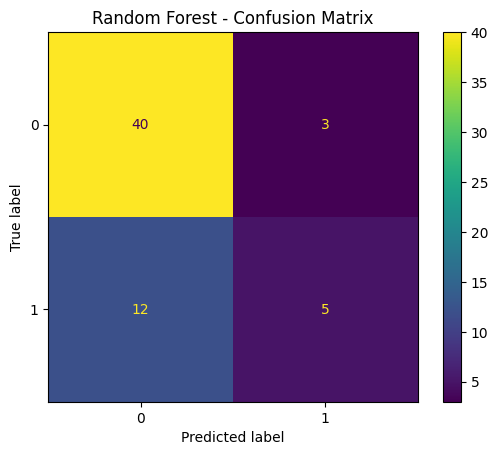

In [29]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()

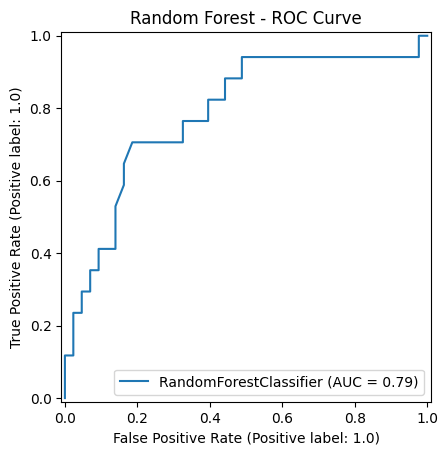

In [30]:
# ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
plt.title("Random Forest - ROC Curve")
plt.show()

#### MODEL 3: SVM (RBF kernel, with Class Weights)

In [32]:
# SVM pipeline with scaling & class weights
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(
        kernel='rbf',
        probability=True,      # needed for ROC-AUC and ROC curve
        class_weight='balanced',
        random_state=42
    ))
])

# Train SVM
svm_pipeline.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_pipeline.predict(X_test)
y_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]

In [33]:
# Evaluation metrics for SVM
acc_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

print("SVM Accuracy:", acc_svm)
print("SVM ROC-AUC:", roc_auc_svm)
print("\nClassification Report (SVM):\n")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7666666666666667
SVM ROC-AUC: 0.7729138166894665

Classification Report (SVM):

              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83        43
         1.0       0.57      0.71      0.63        17

    accuracy                           0.77        60
   macro avg       0.72      0.75      0.73        60
weighted avg       0.79      0.77      0.77        60



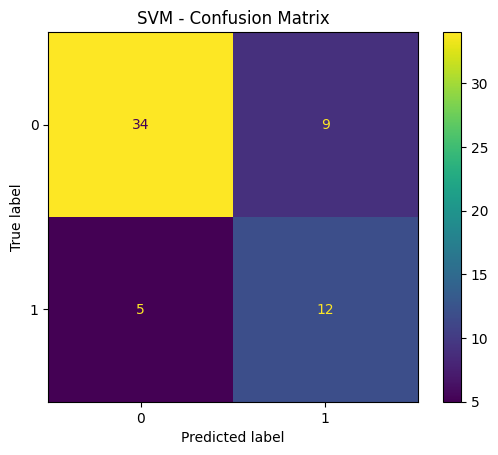

In [34]:
# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title("SVM - Confusion Matrix")
plt.show()

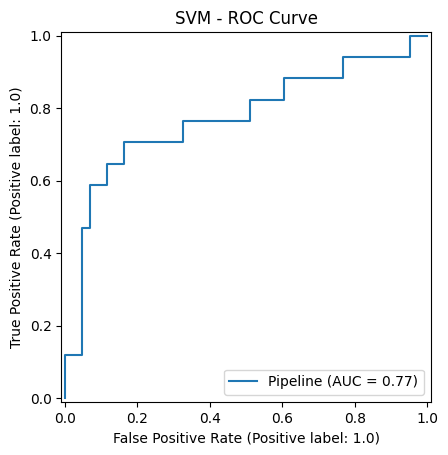

In [35]:
# ROC Curve for SVM
RocCurveDisplay.from_estimator(svm_pipeline, X_test, y_test)
plt.title("SVM - ROC Curve")
plt.show()

In [36]:
# Compare models in a single DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM (RBF)'],
    'Accuracy': [acc_lr, acc_rf, acc_svm],
    'ROC_AUC': [roc_auc_lr, roc_auc_rf, roc_auc_svm]
})

results.sort_values(by='ROC_AUC', ascending=False)

,Model,Accuracy,ROC_AUC
1,Random Forest,0.750000,0.785226
2,SVM (RBF),0.766667,0.772914
0,Logistic Regression,0.766667,0.768810


In [45]:
# Select best model by ROC_AUC
results_sorted = results.sort_values(by='ROC_AUC', ascending=False).reset_index(drop=True)
print(results_sorted)

best_model_name = results_sorted.loc[0, 'Model']
print("Best model based on ROC_AUC:", best_model_name)

                 Model  Accuracy   ROC_AUC
0        Random Forest  0.750000  0.785226
1            SVM (RBF)  0.766667  0.772914
2  Logistic Regression  0.766667  0.768810
Best model based on ROC_AUC: Random Forest


Based on ROC-AUC and accuracy, the Random Forest model outperformed the Logistic Regression and SVM models, while still offering some interpretability via feature importance. Thus, Random Forest is recommended as the final model.

#### **6. KEY FINDINGS AND INSIGHTS**

##### FEATURE IMPORTANCE - RANDOM FOREST

In [46]:
# Feature importances from Random Forest
importances = rf_clf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(10)

employ     0.101778
age        0.069602
longten    0.065507
loglong    0.061186
address    0.057594
tenure     0.056112
longmon    0.054195
income     0.050792
lninc      0.049222
cardten    0.045880
dtype: float64

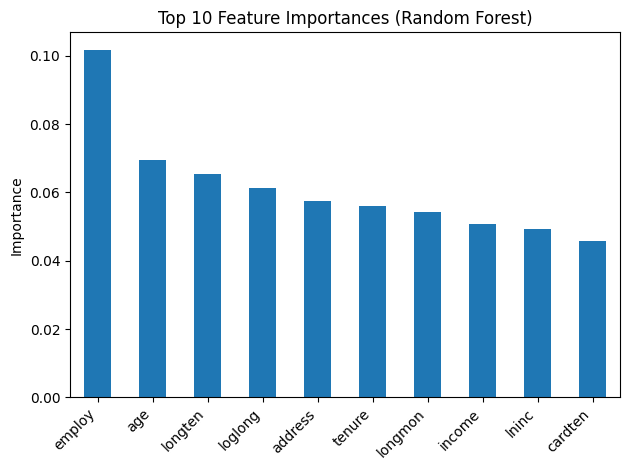

In [47]:
# Plot top 10 important features
top_n = 10
feat_imp.head(top_n).plot(kind='bar')
plt.ylabel('Importance')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### COEFFICIENTS - LOGISTIC REGRESSION (for Direction of Effect)

In [48]:
# Get the LR model and scaler from the pipeline
lr_model = log_reg_pipeline.named_steps['clf']
scaler = log_reg_pipeline.named_steps['scaler']

# Coefficients
coef = lr_model.coef_[0]

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
}).sort_values(by='coefficient', ascending=False)

coef_df.head(10), coef_df.tail(10)

(     feature  coefficient
 12   cardmon     0.838223
 25     lninc     0.555983
 22     ebill     0.467665
 10   tollmon     0.401672
 20  callwait     0.327579
 19  internet     0.276719
 15   tollten     0.226797
 17     voice     0.203808
 9    longmon     0.154667
 18     pager     0.154115,
      feature  coefficient
 2    address    -0.024681
 26   custcat    -0.130030
 23   loglong    -0.160467
 16   cardten    -0.210216
 3     income    -0.302680
 0     tenure    -0.470396
 1        age    -0.617648
 21    confer    -0.810157
 5     employ    -0.873520
 7   callcard    -1.267943)

•	Positive coefficient → higher churn risk

•	Negative coefficient → lower churn risk

#### **7. HYPERPARAMETER TUNING (for Random Forest Model)**

In [50]:
from sklearn.model_selection import GridSearchCV

# Example grid search for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(
        random_state=42,
        class_weight='balanced_subsample'
    ),
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best params:", grid_rf.best_params_)
print("Best ROC-AUC from CV:", grid_rf.best_score_)

Best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC-AUC from CV: 0.7741702741702742


#### **8. HANDLING CLASS IMBALANCE with SMOTE**

In the churn dataset, the target distribution is:

•	0 (No churn): ~71%

•	1 (Churn): ~29%

This is a moderately imbalanced problem. Previously, we addressed this using class weights in the models. As an alternative or complement, we can use **SMOTE** (Synthetic Minority Oversampling Technique).

**What SMOTE does:**

•	Creates synthetic samples of the minority class (churn = 1)

•	Uses nearest neighbors in feature space to generate new, realistic minority examples

•	Balances the class distribution in the training set only

Important: SMOTE must be applied only on the training data (never the test set) to avoid data leakage. The easiest way to guarantee this is to include SMOTE inside a pipeline that is fit only on the training data.

In [51]:
# Install imbalanced-learn
%pip install -q imbalanced-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#### SMOTE + Logistic Regression Pipeline

Here we build a pipeline that:

1.	Applies SMOTE to oversample the minority class in X_train

2.	Scales the data with StandardScaler

3.	Trains a Logistic Regression classifier

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)

# SMOTE + Logistic Regression pipeline
smote_lr_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the pipeline (SMOTE is applied only to the training fold inside .fit)
smote_lr_pipeline.fit(X_train, y_train)

# Predictions
y_pred_smote_lr = smote_lr_pipeline.predict(X_test)
y_proba_smote_lr = smote_lr_pipeline.predict_proba(X_test)[:, 1]

In [55]:
# Evaluation metrics: SMOTE + Logistic Regression
acc_smote_lr = accuracy_score(y_test, y_pred_smote_lr)
roc_auc_smote_lr = roc_auc_score(y_test, y_proba_smote_lr)

print("SMOTE + Logistic Regression Accuracy:", acc_smote_lr)
print("SMOTE + Logistic Regression ROC-AUC:", roc_auc_smote_lr)
print("\nClassification Report (SMOTE + Logistic Regression):\n")
print(classification_report(y_test, y_pred_smote_lr))

SMOTE + Logistic Regression Accuracy: 0.7833333333333333
SMOTE + Logistic Regression ROC-AUC: 0.7606019151846785

Classification Report (SMOTE + Logistic Regression):

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        43
         1.0       0.61      0.65      0.63        17

    accuracy                           0.78        60
   macro avg       0.73      0.74      0.74        60
weighted avg       0.79      0.78      0.79        60



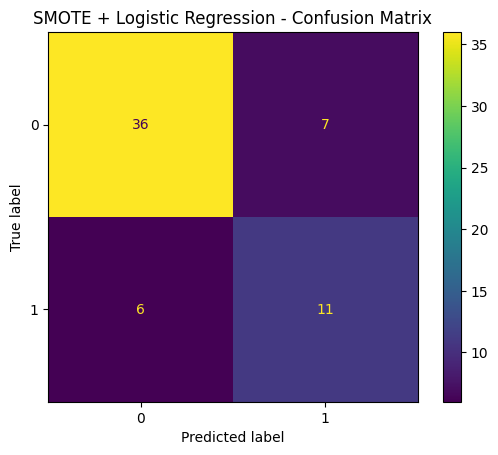

In [56]:
# Confusion matrix for SMOTE + Logistic Regression
cm_smote_lr = confusion_matrix(y_test, y_pred_smote_lr)
disp_smote_lr = ConfusionMatrixDisplay(confusion_matrix=cm_smote_lr)
disp_smote_lr.plot()
plt.title("SMOTE + Logistic Regression - Confusion Matrix")
plt.show()

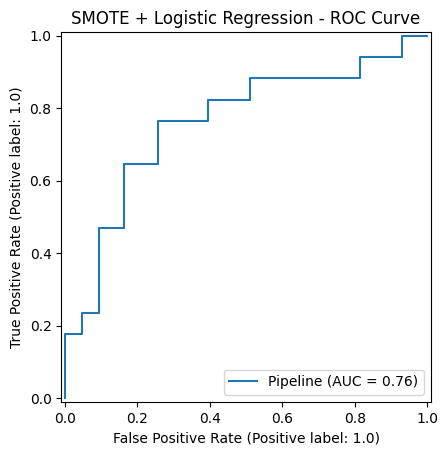

In [57]:
# ROC Curve for SMOTE + Logistic Regression
RocCurveDisplay.from_estimator(smote_lr_pipeline, X_test, y_test)
plt.title("SMOTE + Logistic Regression - ROC Curve")
plt.show()

#### SMOTE + Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

# SMOTE + Random Forest pipeline
smote_rf_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# Train SMOTE + Random Forest
smote_rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred_smote_rf = smote_rf_pipeline.predict(X_test)
y_proba_smote_rf = smote_rf_pipeline.predict_proba(X_test)[:, 1]

In [59]:
# Evaluation metrics: SMOTE + Random Forest
acc_smote_rf = accuracy_score(y_test, y_pred_smote_rf)
roc_auc_smote_rf = roc_auc_score(y_test, y_proba_smote_rf)

print("SMOTE + Random Forest Accuracy:", acc_smote_rf)
print("SMOTE + Random Forest ROC-AUC:", roc_auc_smote_rf)
print("\nClassification Report (SMOTE + Random Forest):\n")
print(classification_report(y_test, y_pred_smote_rf))

SMOTE + Random Forest Accuracy: 0.7833333333333333
SMOTE + Random Forest ROC-AUC: 0.7722298221614227

Classification Report (SMOTE + Random Forest):

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86        43
         1.0       0.70      0.41      0.52        17

    accuracy                           0.78        60
   macro avg       0.75      0.67      0.69        60
weighted avg       0.77      0.78      0.76        60



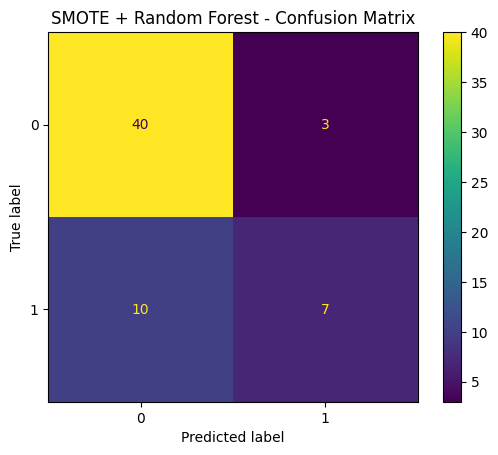

In [60]:
# Confusion matrix for SMOTE + Random Forest
cm_smote_rf = confusion_matrix(y_test, y_pred_smote_rf)
disp_smote_rf = ConfusionMatrixDisplay(confusion_matrix=cm_smote_rf)
disp_smote_rf.plot()
plt.title("SMOTE + Random Forest - Confusion Matrix")
plt.show()

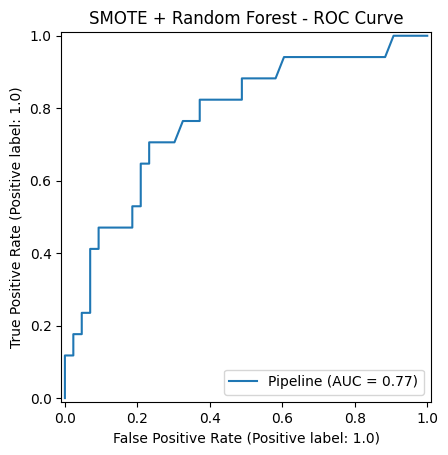

In [61]:
# ROC Curve for SMOTE + Random Forest
RocCurveDisplay.from_estimator(smote_rf_pipeline, X_test, y_test)
plt.title("SMOTE + Random Forest - ROC Curve")
plt.show()

#### SMOTE + SVM Pipeline

In [65]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler

# SMOTE + SVM pipeline
smote_svm_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', SVC(
        kernel='rbf',
        probability=True,     # required for ROC-AUC and ROC curves
        random_state=42
    ))
])

# Train the pipeline (SMOTE applies only to training data internally)
smote_svm_pipeline.fit(X_train, y_train)

# Predictions
y_pred_smote_svm = smote_svm_pipeline.predict(X_test)
y_proba_smote_svm = smote_svm_pipeline.predict_proba(X_test)[:, 1]

In [66]:
# Evaluation Metrics (SMOTE + SVM)
acc_smote_svm = accuracy_score(y_test, y_pred_smote_svm)
roc_auc_smote_svm = roc_auc_score(y_test, y_proba_smote_svm)

print("SMOTE + SVM Accuracy:", acc_smote_svm)
print("SMOTE + SVM ROC-AUC:", roc_auc_smote_svm)
print("\nClassification Report (SMOTE + SVM):\n")
print(classification_report(y_test, y_pred_smote_svm))

SMOTE + SVM Accuracy: 0.7833333333333333
SMOTE + SVM ROC-AUC: 0.7373461012311902

Classification Report (SMOTE + SVM):

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        43
         1.0       0.60      0.71      0.65        17

    accuracy                           0.78        60
   macro avg       0.74      0.76      0.75        60
weighted avg       0.80      0.78      0.79        60



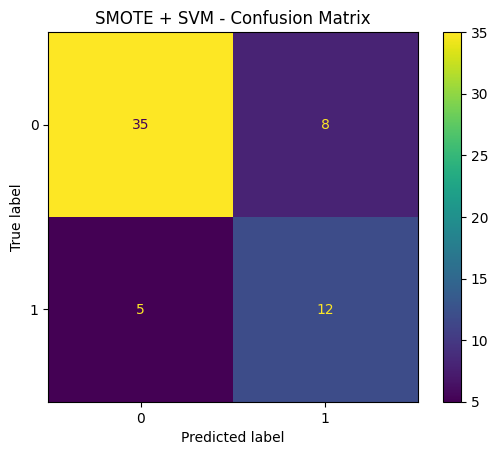

In [67]:
# Confusion Matrix
cm_smote_svm = confusion_matrix(y_test, y_pred_smote_svm)
disp_smote_svm = ConfusionMatrixDisplay(confusion_matrix=cm_smote_svm)
disp_smote_svm.plot()
plt.title("SMOTE + SVM - Confusion Matrix")
plt.show()

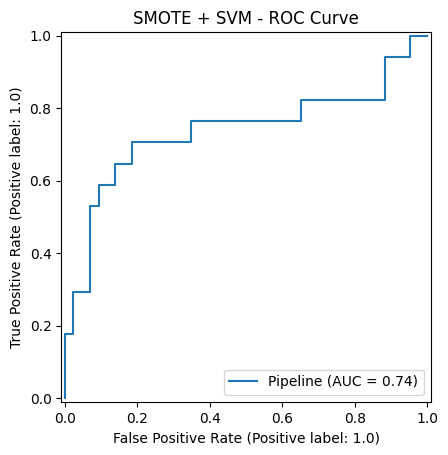

In [68]:
# ROC Curve for SMOTE + SVM
RocCurveDisplay.from_estimator(smote_svm_pipeline, X_test, y_test)
plt.title("SMOTE + SVM - ROC Curve")
plt.show()

In [69]:
# MODEL COMPARISON

comparison_results = pd.DataFrame({
    'Model': [
        'LR (class_weight)',
        'RF (class_weight)',
        'SVM (class_weight)',
        'LR (SMOTE)',
        'RF (SMOTE)',
        'SVM (SMOTE)'
    ],
    'Accuracy': [
        acc_lr,
        acc_rf,
        acc_svm,
        acc_smote_lr,
        acc_smote_rf,
        acc_smote_svm
    ],
    'ROC_AUC': [
        roc_auc_lr,
        roc_auc_rf,
        roc_auc_svm,
        roc_auc_smote_lr,
        roc_auc_smote_rf,
        roc_auc_smote_svm
    ]
})

comparison_results.sort_values(by='ROC_AUC', ascending=False)

,Model,Accuracy,ROC_AUC
1,RF (class_weight),0.750000,0.785226
2,SVM (class_weight),0.766667,0.772914
4,RF (SMOTE),0.783333,0.772230
0,LR (class_weight),0.766667,0.768810
3,LR (SMOTE),0.783333,0.760602
5,SVM (SMOTE),0.783333,0.737346


#### **FINAL MODEL RECOMMENDATION**

After evaluating six models (three with class weights and three using SMOTE) the Random Forest classifier with class weights emerged as the best overall performer.

Although some SMOTE-based models achieved slightly higher accuracy (0.7833), they consistently recorded lower ROC-AUC scores, indicating weaker discrimination between churn and non-churn customers. The Random Forest with class weights achieved the highest ROC-AUC score (0.7852), making it the most effective at ranking customers by churn risk, which is essential in imbalanced classification problems such as churn prediction.

Additionally, Random Forest offers strong interpretability through feature importance analysis, making it more actionable for business stakeholders who need to understand the drivers behind churn.

Therefore, Random Forest (class_weight) is recommended as the final model due to its superior ROC-AUC performance, stable accuracy, and interpretability benefits.